# **Primera Aproximación a los datos**

## **Descripción del dataset**

El dataset forma parte de las bases de datos de la institución médica. Contiene información referida a los turnos correspondientes a consultas y prácticas médicas que se realizan en cada uno de los centros de atención.

### **Campos:**

##### **Información relativa al paciente**

* **Paciente:** Nombre y apellido del paciente (anonimizado)

* **Edad:** Edad del paciente

* **Sexo:** Sexo del paciente

* **Prestador:** Obra social, prepaga o consulta particular 

##### **Información relativa al turno**

* **CentroDeAtencion:** Cada uno de los cuatro centros de atención con que cuenta la institución

* **Servicio:** Especialidad médica correspondiente

* **Recurso:** Profesional o instrumento específico correspondiente al turno

* **PrestacionAsignada:** Prestación asignada en en el turno

* **EstadoDelTurno:** Estado (presente o pasado) correspondiente al turno. Indica si el turno fue atendido, se encuentra libre, si el paciente se ausentó, si fue cancelado o reprogramado, etc.

* **NombreDelCanal:** Canal de comunicación por donde se realizó la reserva del turno

* **FechaDelTurno:** Día correspondiente al turno

* **HoraDelTurno:** Horario del turno

* **EsSobreTurno:** Indica si se trata de un turno regular o de un sobre turno

* **TipoDeTurnoAsignado:** Indica si el turno corresponde a una primera consulta, a la realización de una práctica, a un control, etc.


Importamos librerías y configuración general

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

pd.options.display.max_columns = 30
pd.options.display.max_rows = 50

Definimos funciones auxiliares

In [6]:
def get_null_fraction(df, column):
    return df[column].isnull().sum() / df.shape[0]
def get_null_percent(df, column):
    return 'NULL = {:.2f}%'.format(100*get_null_fraction(df, column))

Leemos el dataset

In [2]:
data_dir = os.path.join('.', 'data')
data_file_name = 'dataset_turnos_2019.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name, sep=';')
print(df.shape)
df.tail()

(1194014, 13)


,CentroDeAtencion,Prestador,Recurso,Servicio,FechaDelTurno,EstadoDelTurno,Paciente,Sexo,Edad,PrestacionAsignada,NombreDelCanal,EsSobreTurno,TipoDeTurnoAsignado
1194009,2,-,fa089caaca143ad1ff284640fb4cd2d7,RESONANCIA,2019-12-30 23:30:00,Libre,NaN,,0,NaN,NaN,NO,NaN
1194010,1,OSDE,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:24:00,Atendido,15a7d517fa140ac76f9a7a79de343d81,M,44,ECOGRAFIA COMPLETA DE ABDOMEN,NaN,SI,Práctica
1194011,1,OMINT S. A. DE SERVICIOS,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 09:27:00,Atendido,2bd3a6fd81b29758aa12a13d210e6fdc,M,53,ECOGRAFIA DE PARTES BLANDAS,NaN,SI,Práctica
1194012,1,SANCOR,cba3f4d0f0775d3211c12cbca0ab3781,ECOGRAFIA,2019-12-31 11:29:00,Atendido,d72ffdcc0121edd182da6a32578e4bb1,F,28,ECOGRAFIA TRANSVAGINAL,NaN,SI,Práctica
1194013,1,MEDIFE ASOCIACIÓN CIVIL,a2073c1d145a1b5fd133f927fbbd7913,RADIOGRAFIA,2019-12-31 14:23:00,Atendido,71f43803027051f252e553746b44820b,M,2,Prestaciones multiples,NaN,SI,Práctica


Analizamos los tipos de datos de cada campo inferidos por `pandas`

In [3]:
dtypes = pd.DataFrame(df.dtypes)
dtypes.index.name = 'Campo'
dtypes.rename(columns={0: 'Tipo'})

,Tipo
Campo,
CentroDeAtencion,int64
Prestador,object
Recurso,object
Servicio,object
FechaDelTurno,object
EstadoDelTurno,object
Paciente,object
Sexo,object
Edad,int64


Transformamos el campo **FechaDelTurno** en *datetime*

In [4]:
df.FechaDelTurno = pd.to_datetime(df.FechaDelTurno)

Buscamos posibles duplicados

In [5]:
df.duplicated().sum()

0

Verificamos que los turnos estén ordenados por fecha

In [57]:
## Este valor debería ser no negativo
df.sort_values(by='FechaDelTurno').FechaDelTurno.diff().min()

Timedelta('0 days 00:00:00')

### Exploración de los campos

Fecha

In [56]:
print('Primer turno:', df.FechaDelTurno.min())
print('Último turno:', df.FechaDelTurno.max())

Primer turno: 2019-01-01 11:30:00
Último turno: 2019-12-31 14:23:00


Centro de atención

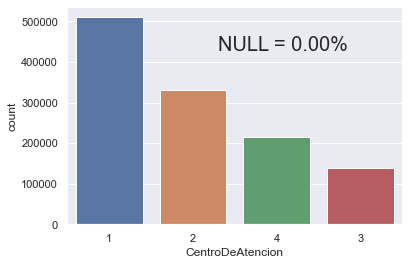

In [18]:
col = 'CentroDeAtencion'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
null_percent = get_null_percent(df, col)    
plt.text(0.45, 0.8, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

Tipo de turno asignado

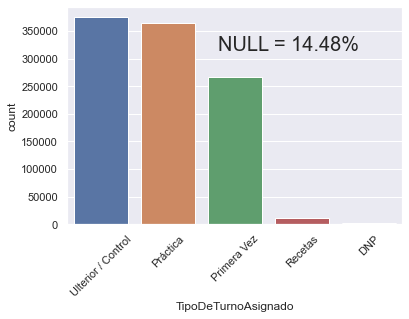

In [19]:
col = 'TipoDeTurnoAsignado'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
null_percent = get_null_percent(df, col)    
plt.text(0.45, 0.8, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

Cantidad de servicios: 105


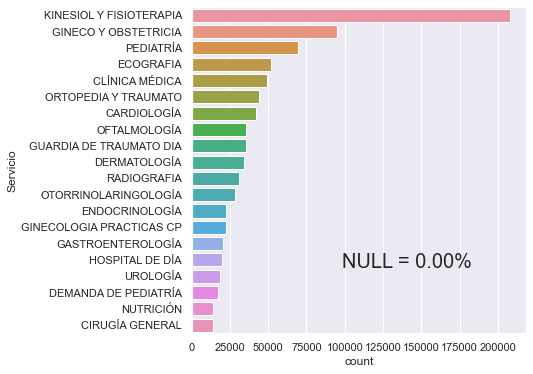

In [22]:
col = 'Servicio'
print('Cantidad de servicios:', df[col].unique().size)

fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
null_percent = get_null_percent(df, col)    
ax.text(0.45, 0.2, null_percent, transform=ax.transAxes, fontsize=20)
plt.show()

Cantidad de prestaciones asignadas: 817


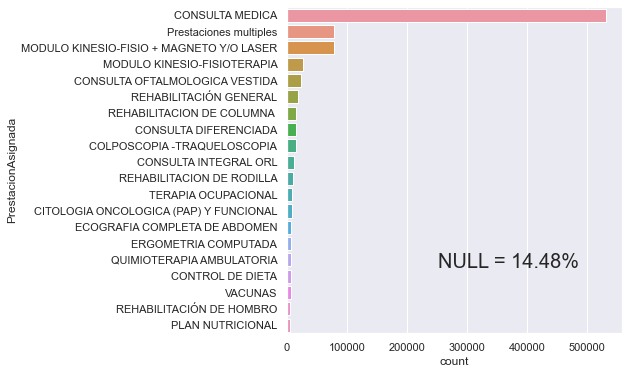

In [23]:
col = 'PrestacionAsignada'
print('Cantidad de prestaciones asignadas:', df[col].unique().size)
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:20].index, ax=ax)
null_percent = get_null_percent(df, col)    
plt.text(0.45, 0.2, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

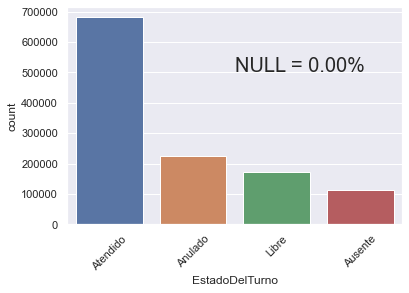

In [24]:
col = 'EstadoDelTurno'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
null_percent = get_null_percent(df, col)    
plt.text(0.5, 0.7, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

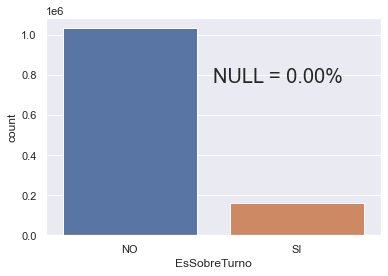

In [25]:
col = 'EsSobreTurno'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
null_percent = get_null_percent(df, col)    
plt.text(0.5, 0.7, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

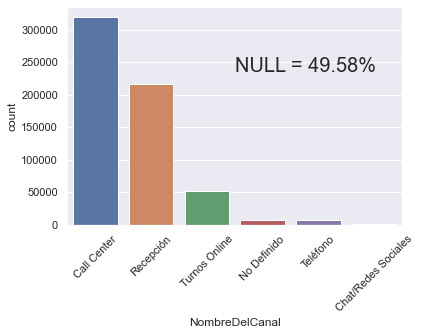

In [26]:
col = 'NombreDelCanal'
sns.countplot(x=col, data=df, order=df[col].value_counts().index)
plt.xticks(rotation=45)
null_percent = get_null_percent(df, col)    
plt.text(0.5, 0.7, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()

Edad

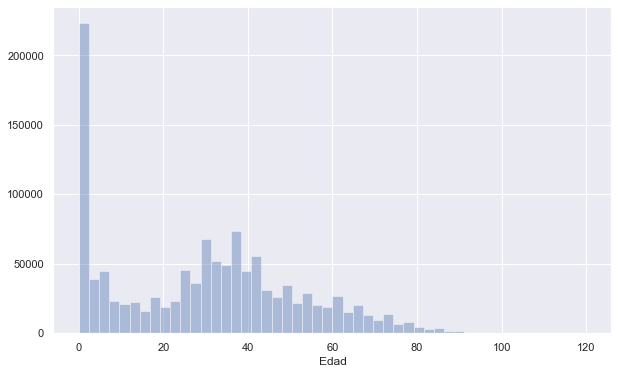

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df.Edad, ax=ax, kde=False)
plt.show()

Sexo

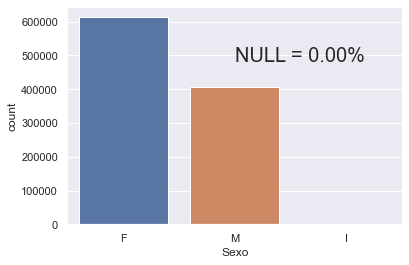

In [51]:
col = 'Sexo'
_df = df[~df.Paciente.isnull()]
sns.countplot(x=col, data=_df, order=_df[col].value_counts().index)
null_percent = get_null_percent(_df, col)    
plt.text(0.5, 0.75, null_percent, transform=plt.gca().transAxes, fontsize=20)
plt.show()